In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import CategoricalCrossentropy
import PIL
from keras.callbacks import EarlyStopping
from keras import optimizers
import os
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.optimizers import SGD, Adam, RMSprop
import tensorflow as tf
from keras.models import Model

In [3]:
train_data_dir= '/content/drive/MyDrive/LandT/train/'
val_data_dir= '/content/drive/MyDrive/LandT/valid/'

batch_size=64

train_datagen = ImageDataGenerator(
rescale=1./255)


train_it = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

val_it = train_datagen.flow_from_directory(
    val_data_dir, 
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

# Your model here ...
trained_model = InceptionResNetV2(input_shape = [299, 299] + [3], weights='imagenet', include_top=False)
  
for layer in trained_model.layers[:777]:
  layer.trainable = False

for layer in trained_model.layers[777:]:
  layer.trainable = True

x = trained_model.output
x = GlobalAveragePooling2D()(x)

# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# this is the model we will train
model = Model(inputs = trained_model.input, outputs = predictions)
model.compile(optimizer=RMSprop(learning_rate =0.00001, decay = 1e-6), loss='binary_crossentropy', metrics=['acc',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


Found 600 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
219055592/219055592 [==============================] - 10s 0us/step


In [4]:

model.fit(
train_it,
steps_per_epoch = train_it.samples //batch_size,
validation_data = val_it, 
validation_steps = val_it.samples // batch_size,
epochs = 19,
verbose=1,
callbacks=[EarlyStopping(patience=10,restore_best_weights=True)])

Epoch 1/19
9/9 [==============================] - ETA: 0s - loss: 0.5496 - acc: 0.7836 - precision: 0.7104 - recall: 0.9630

9/9 [==============================] - 18s 425ms/step - loss: 0.5496 - acc: 0.7836 - precision: 0.7104 - recall: 0.9630
Epoch 2/19
9/9 [==============================] - ETA: 0s - loss: 0.4275 - acc: 0.9254 - precision: 0.9094 - recall: 0.9491

9/9 [==============================] - 3s 313ms/step - loss: 0.4275 - acc: 0.9254 - precision: 0.9094 - recall: 0.9491
Epoch 3/19
9/9 [==============================] - ETA: 0s - loss: 0.3706 - acc: 0.9552 - precision: 0.9554 - recall: 0.9554

9/9 [==============================] - 3s 309ms/step - loss: 0.3706 - acc: 0.9552 - precision: 0.9554 - recall: 0.9554
Epoch 4/19
9/9 [==============================] - ETA: 0s - loss: 0.3125 - acc: 0.9608 - precision: 0.9659 - recall: 0.9551

9/9 [==============================] - 3s 315ms/step - loss: 0.3125 - acc: 0.9608 - precision: 0.9659 - recall: 0.9551
Epoch 5/19
9/9 [==============================] - ETA: 0s - loss: 0.2720 - acc: 0.9534 - precision: 0.9659 - recall: 0.9410

9/9 [==============================] - 3s 343ms/step - loss: 0.2720 - acc: 0.9534 - precision: 0.9659 - recall: 0.9410
Epoch 6/19
9/9 [==============================] - ETA: 0s - loss: 0.2416 - acc: 0.9646 - precision: 0.9698 - recall: 0.9590

9/9 [==============================] - 3s 311ms/step - loss: 0.2416 - acc: 0.9646 - precision: 0.9698 - recall: 0.9590
Epoch 7/19
9/9 [==============================] - ETA: 0s - loss: 0.2212 - acc: 0.9496 - precision: 0.9730 - recall: 0.9265

9/9 [==============================] - 3s 339ms/step - loss: 0.2212 - acc: 0.9496 - precision: 0.9730 - recall: 0.9265
Epoch 8/19
9/9 [==============================] - ETA: 0s - loss: 0.1889 - acc: 0.9608 - precision: 0.9804 - recall: 0.9398

9/9 [==============================] - 3s 320ms/step - loss: 0.1889 - acc: 0.9608 - precision: 0.9804 - recall: 0.9398
Epoch 9/19
9/9 [==============================] - ETA: 0s - loss: 0.1843 - acc: 0.9590 - precision: 0.9699 - recall: 0.9485

9/9 [==============================] - 3s 335ms/step - loss: 0.1843 - acc: 0.9590 - precision: 0.9699 - recall: 0.9485
Epoch 10/19
9/9 [==============================] - ETA: 0s - loss: 0.1660 - acc: 0.9552 - precision: 0.9735 - recall: 0.9380

9/9 [==============================] - 3s 316ms/step - loss: 0.1660 - acc: 0.9552 - precision: 0.9735 - recall: 0.9380
Epoch 11/19
9/9 [==============================] - ETA: 0s - loss: 0.1553 - acc: 0.9590 - precision: 0.9729 - recall: 0.9436

9/9 [==============================] - 3s 322ms/step - loss: 0.1553 - acc: 0.9590 - precision: 0.9729 - recall: 0.9436
Epoch 12/19
9/9 [==============================] - ETA: 0s - loss: 0.1394 - acc: 0.9571 - precision: 0.9773 - recall: 0.9382

9/9 [==============================] - 3s 341ms/step - loss: 0.1394 - acc: 0.9571 - precision: 0.9773 - recall: 0.9382
Epoch 13/19
9/9 [==============================] - ETA: 0s - loss: 0.1331 - acc: 0.9583 - precision: 0.9749 - recall: 0.9412

9/9 [==============================] - 3s 338ms/step - loss: 0.1331 - acc: 0.9583 - precision: 0.9749 - recall: 0.9412
Epoch 14/19
9/9 [==============================] - ETA: 0s - loss: 0.1185 - acc: 0.9646 - precision: 0.9774 - recall: 0.9522

9/9 [==============================] - 3s 340ms/step - loss: 0.1185 - acc: 0.9646 - precision: 0.9774 - recall: 0.9522
Epoch 15/19
9/9 [==============================] - ETA: 0s - loss: 0.1127 - acc: 0.9670 - precision: 0.9753 - recall: 0.9583

9/9 [==============================] - 3s 344ms/step - loss: 0.1127 - acc: 0.9670 - precision: 0.9753 - recall: 0.9583
Epoch 16/19
9/9 [==============================] - ETA: 0s - loss: 0.1086 - acc: 0.9683 - precision: 0.9882 - recall: 0.9474

9/9 [==============================] - 3s 333ms/step - loss: 0.1086 - acc: 0.9683 - precision: 0.9882 - recall: 0.9474
Epoch 17/19
9/9 [==============================] - ETA: 0s - loss: 0.1074 - acc: 0.9627 - precision: 0.9733 - recall: 0.9515

9/9 [==============================] - 3s 349ms/step - loss: 0.1074 - acc: 0.9627 - precision: 0.9733 - recall: 0.9515
Epoch 18/19
9/9 [==============================] - ETA: 0s - loss: 0.0965 - acc: 0.9664 - precision: 0.9813 - recall: 0.9527

9/9 [==============================] - 3s 328ms/step - loss: 0.0965 - acc: 0.9664 - precision: 0.9813 - recall: 0.9527
Epoch 19/19
9/9 [==============================] - ETA: 0s - loss: 0.0940 - acc: 0.9701 - precision: 0.9883 - recall: 0.9511

9/9 [==============================] - 3s 356ms/step - loss: 0.0940 - acc: 0.9701 - precision: 0.9883 - recall: 0.9511


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255.)
test_data_dir = '/content/drive/MyDrive/LandT/test/'

test_it = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(299,299),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

test_loss, test_accuracy,test_pre,test_recall  = model.evaluate(test_it)
print('test_loss = ', test_loss, ', test_accuracy = ',  test_accuracy , 'test_precision=', test_pre , 'test_recall=', test_recall , 'test_f1=', 2*test_pre*test_recall/(test_pre+test_recall))

Found 200 images belonging to 2 classes.
200/200 [==============================] - 12s 39ms/step - loss: 0.1114 - acc: 0.9950 - precision: 0.9901 - recall: 1.0000
test_loss =  0.11136139184236526 , test_accuracy =  0.9950000047683716 test_precision= 0.9900990128517151 test_recall= 1.0 test_f1= 0.9950248771119697


1/1 [==============================] - 3s 3s/step


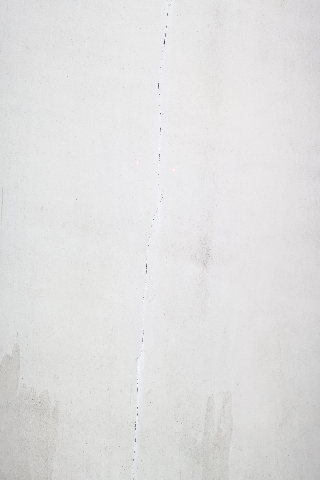


 Negative
1/1 [==============================] - 0s 41ms/step


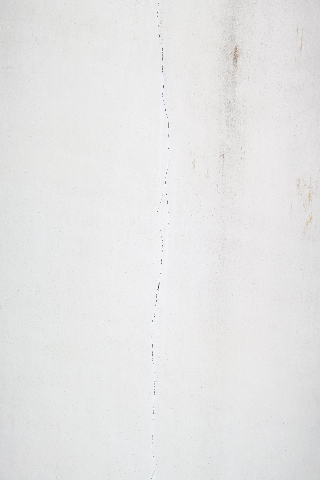


 Negative
1/1 [==============================] - 0s 44ms/step


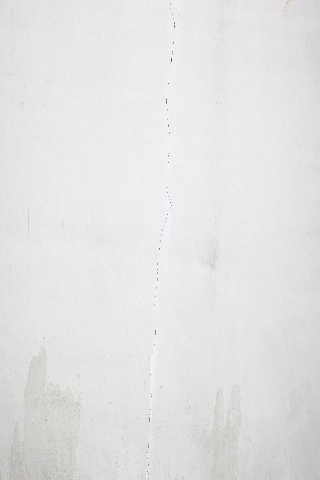


 Negative
1/1 [==============================] - 0s 46ms/step


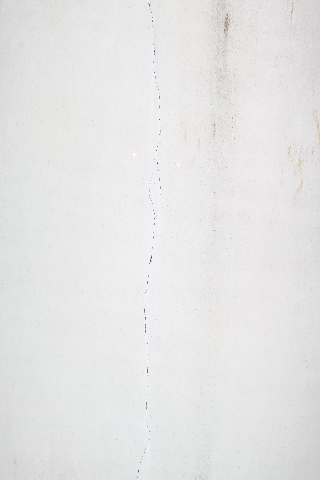


 Positive
1/1 [==============================] - 0s 44ms/step


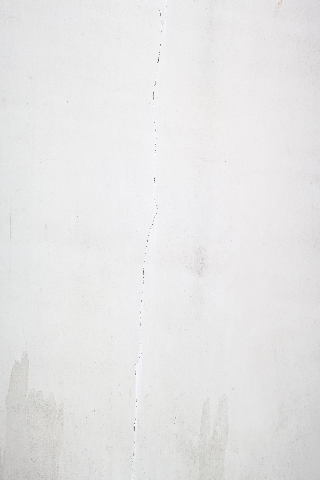


 Positive
1/1 [==============================] - 0s 48ms/step


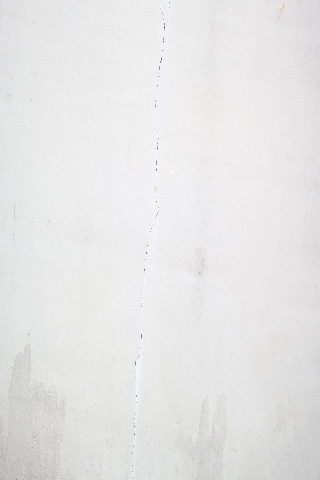


 Negative


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

p='/content/drive/MyDrive/LandT/predict/'
c=0
for i in os.listdir(p):
  image_path = p+i
  image = tf.keras.preprocessing.image.load_img(image_path,target_size=(299,299))
  input_arr = tf.keras.preprocessing.image.img_to_array(image)
  input_arr = input_arr*(1./255)
  input_arr = np.array([input_arr])  # Convert single image to a batch.
  prediction = model.predict(input_arr)
  img = cv2.imread(image_path)
  h,w,c = img.shape
  img = cv2.resize(img, (h//10, w//10))  
  cv2_imshow(img)
  if prediction>=0.5:
    print('\n Positive')
  else:
    print('\n Negative')
  
